# Dota 2 Meta Prediction

## Introduction

### Problem Statement
### Objectives

## Data Gathering and Prepration

In [1]:
# import  relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Read data and data cleaning
pro_df = pd.read_csv('./datasets/Current_Pro_meta.csv')
pro_df.head()

Unnamed: 0                Name Primary Attribute Attack Type  Attack Range  \
0           0             Abaddon               all       Melee           150   
1           1           Alchemist               str       Melee           150   
2           2  Ancient Apparition               int      Ranged           675   
3           3           Anti-Mage               agi       Melee           150   
4           4          Arc Warden               agi      Ranged           625   

                                               Roles  Total Pro wins  \
0                            Support, Carry, Durable              18   
1  Carry, Support, Durable, Disabler, Initiator, ...              31   
2                           Support, Disabler, Nuker              53   
3                               Carry, Escape, Nuker              33   
4                               Carry, Escape, Nuker              10   

   Times Picked  Times Banned  Win Rate  Niche Hero?  
0            43            60     41.86        False  
1            75            34     41.33        False  
2           113            95     46.90        False  
3            72           234     45.83        False  
4            18            54     55.56        False

In [3]:
# check for any null values
print(pro_df.info())
pro_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         124 non-null    int64  
 1   Name               124 non-null    object 
 2   Primary Attribute  124 non-null    object 
 3   Attack Type        124 non-null    object 
 4   Attack Range       124 non-null    int64  
 5   Roles              124 non-null    object 
 6   Total Pro wins     124 non-null    int64  
 7   Times Picked       124 non-null    int64  
 8   Times Banned       124 non-null    int64  
 9   Win Rate           124 non-null    float64
 10  Niche Hero?        124 non-null    bool   
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 9.9+ KB
None


Unnamed: 0           0
Name                 0
Primary Attribute    0
Attack Type          0
Attack Range         0
Roles                0
Total Pro wins       0
Times Picked         0
Times Banned         0
Win Rate             0
Niche Hero?          0
dtype: int64

In [4]:
# rename Unnamed column to hero_id
pro_df.rename(columns={'Unnamed: 0':'Hero_ID'}, inplace=True)
pro_df.head()

Hero_ID                Name Primary Attribute Attack Type  Attack Range  \
0        0             Abaddon               all       Melee           150   
1        1           Alchemist               str       Melee           150   
2        2  Ancient Apparition               int      Ranged           675   
3        3           Anti-Mage               agi       Melee           150   
4        4          Arc Warden               agi      Ranged           625   

                                               Roles  Total Pro wins  \
0                            Support, Carry, Durable              18   
1  Carry, Support, Durable, Disabler, Initiator, ...              31   
2                           Support, Disabler, Nuker              53   
3                               Carry, Escape, Nuker              33   
4                               Carry, Escape, Nuker              10   

   Times Picked  Times Banned  Win Rate  Niche Hero?  
0            43            60     41.86        False  
1            75            34     41.33        False  
2           113            95     46.90        False  
3            72           234     45.83        False  
4            18            54     55.56        False

In [5]:
pro_df.describe()

Hero_ID  Attack Range  Total Pro wins  Times Picked  Times Banned  \
count  124.000000    124.000000      124.000000    124.000000    124.000000   
mean    61.500000    350.604839       96.451613    192.903226    268.508065   
std     35.939764    200.271759       68.233382    135.962717    219.889089   
min      0.000000    150.000000       10.000000     18.000000     16.000000   
25%     30.750000    150.000000       46.500000     90.000000    104.500000   
50%     61.500000    340.000000       85.500000    165.500000    209.000000   
75%     92.250000    550.000000      128.750000    257.500000    371.500000   
max    123.000000    700.000000      391.000000    814.000000    916.000000   

         Win Rate  
count  124.000000  
mean    49.894839  
std      4.996718  
min     40.300000  
25%     46.540000  
50%     49.375000  
75%     52.680000  
max     69.410000

## Explotary Data Analysis (EDA)

(array([31., 24., 32.,  6.,  6.,  6.,  8.,  5.,  3.,  3.]),
 array([ 16., 106., 196., 286., 376., 466., 556., 646., 736., 826., 916.]),
 <BarContainer object of 10 artists>)

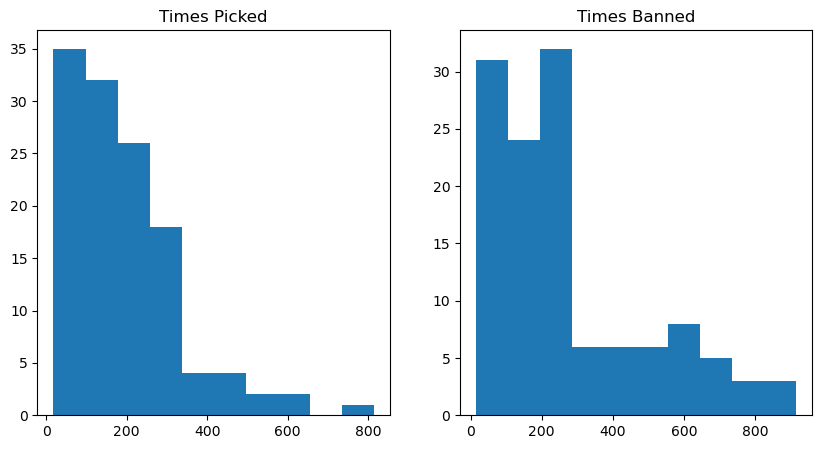

In [6]:
# data visualizations
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].set_title('Times Picked')
ax[0].hist(pro_df['Times Picked'])

ax[1].set_title('Times Banned')
ax[1].hist(pro_df['Times Banned'])

## Unsupervised Machine Learning

In [7]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
# new df which consist of numerical data only
num_df = pro_df.copy()
num_df.drop(['Name','Primary Attribute','Attack Type','Roles'], axis=1,inplace=True)
num_df.head()

Hero_ID  Attack Range  Total Pro wins  Times Picked  Times Banned  \
0        0           150              18            43            60   
1        1           150              31            75            34   
2        2           675              53           113            95   
3        3           150              33            72           234   
4        4           625              10            18            54   

   Win Rate  Niche Hero?  
0     41.86        False  
1     41.33        False  
2     46.90        False  
3     45.83        False  
4     55.56        False

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

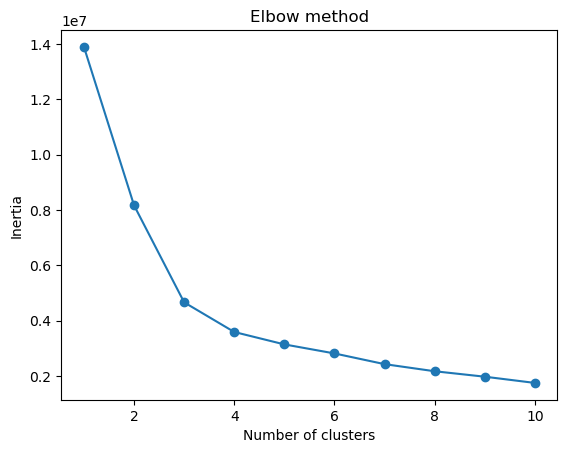

In [9]:
# Determine number of cluster

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(num_df)
    inertias.append(kmeans.inertia_) #main function to determine the clusters i "inertia"

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# Optimal K=4
# Fit K-Means to the data with K=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(num_df)

# Add the cluster labels to the DataFrame
num_df['Cluster'] = clusters

# Create separate dataframes for each cluster
cluster_dataframes = [num_df[num_df['Cluster'] == i] for i in range(4)]

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
num_df.head()

Hero_ID  Attack Range  Total Pro wins  Times Picked  Times Banned  \
0        0           150              18            43            60   
1        1           150              31            75            34   
2        2           675              53           113            95   
3        3           150              33            72           234   
4        4           625              10            18            54   

   Win Rate  Niche Hero?  Cluster  
0     41.86        False        0  
1     41.33        False        0  
2     46.90        False        1  
3     45.83        False        0  
4     55.56        False        1

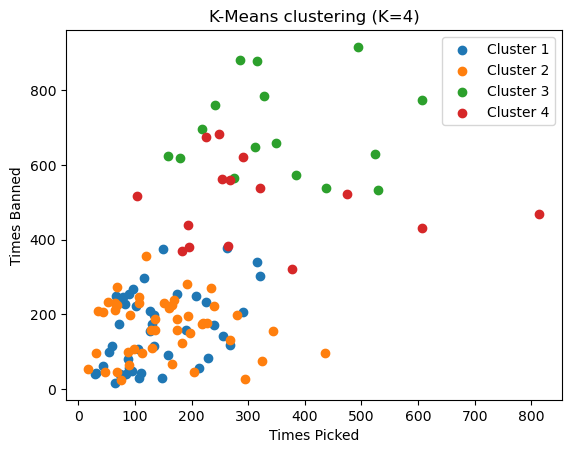

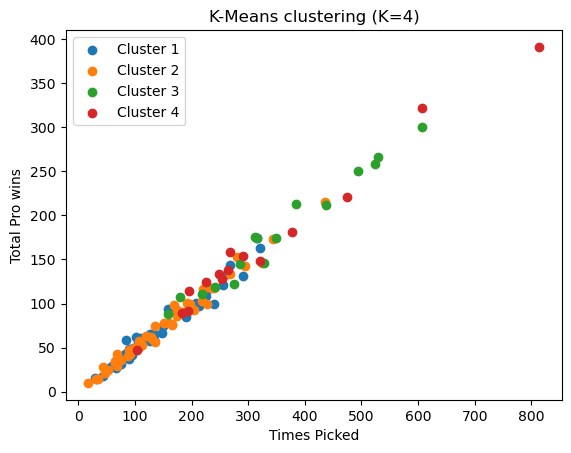

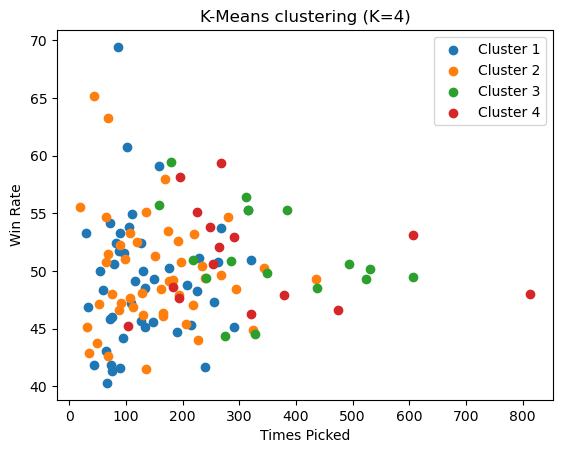

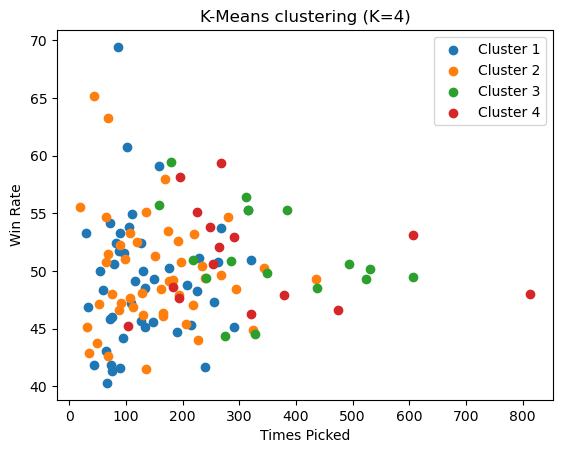

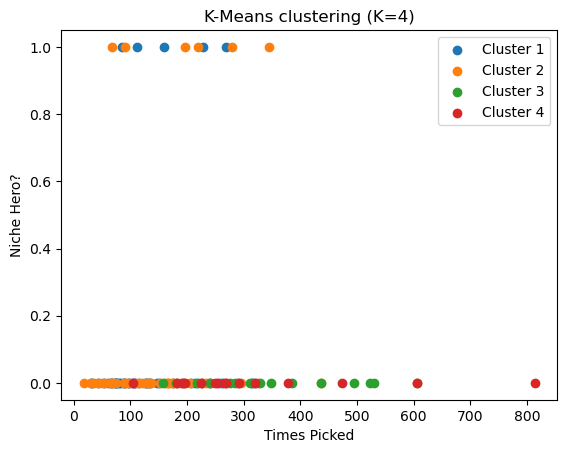

In [12]:
# Visualize the clusters
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Times Picked'], cluster_df['Times Banned'], label=f'Cluster {i + 1}')

plt.xlabel('Times Picked')
plt.ylabel('Times Banned')
plt.title('K-Means clustering (K=4)')
plt.legend()
plt.show()

for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Times Picked'], cluster_df['Total Pro wins'], label=f'Cluster {i + 1}')

plt.xlabel('Times Picked')
plt.ylabel('Total Pro wins')
plt.title('K-Means clustering (K=4)')
plt.legend()
plt.show()

for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Times Picked'], cluster_df['Win Rate'], label=f'Cluster {i + 1}')

plt.xlabel('Times Picked')
plt.ylabel('Win Rate')
plt.title('K-Means clustering (K=4)')
plt.legend()
plt.show()

for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Times Picked'], cluster_df['Win Rate'], label=f'Cluster {i + 1}')

plt.xlabel('Times Picked')
plt.ylabel('Win Rate')
plt.title('K-Means clustering (K=4)')
plt.legend()
plt.show()

for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['Times Picked'], cluster_df['Niche Hero?'], label=f'Cluster {i + 1}')

plt.xlabel('Times Picked')
plt.ylabel('Niche Hero?')
plt.title('K-Means clustering (K=4)')
plt.legend()
plt.show()

In [39]:
# Merge dataframe

col_to_add = num_df.columns.difference(pro_df.columns)
merged = pd.merge(pro_df, num_df[col_to_add], how='outer', left_index=True, right_index=True)
merged

Hero_ID                Name Primary Attribute Attack Type  Attack Range  \
0          0             Abaddon               all       Melee           150   
1          1           Alchemist               str       Melee           150   
2          2  Ancient Apparition               int      Ranged           675   
3          3           Anti-Mage               agi       Melee           150   
4          4          Arc Warden               agi      Ranged           625   
..       ...                 ...               ...         ...           ...   
119      119          Windranger               all      Ranged           600   
120      120       Winter Wyvern               all      Ranged           425   
121      121        Witch Doctor               int      Ranged           550   
122      122         Wraith King               str       Melee           150   
123      123                Zeus               int      Ranged           380   

                                                 Roles  Total Pro wins  \
0                              Support, Carry, Durable              18   
1    Carry, Support, Durable, Disabler, Initiator, ...              31   
2                             Support, Disabler, Nuker              53   
3                                 Carry, Escape, Nuker              33   
4                                 Carry, Escape, Nuker              10   
..                                                 ...             ...   
119            Carry, Support, Disabler, Escape, Nuker             154   
120                           Support, Disabler, Nuker              15   
121                           Support, Nuker, Disabler              77   
122       Carry, Support, Durable, Disabler, Initiator              61   
123                                       Nuker, Carry             101   

     Times Picked  Times Banned  Win Rate  Niche Hero?  Cluster  
0              43            60     41.86        False        0  
1              75            34     41.33        False        0  
2             113            95     46.90        False        1  
3              72           234     45.83        False        0  
4              18            54     55.56        False        1  
..            ...           ...       ...          ...      ...  
119           291           621     52.92        False        3  
120            35           209     42.86        False        1  
121           166            68     46.39        False        1  
122           111            42     54.95         True        0  
123           192           282     52.60        False        1  

[124 rows x 12 columns]

In [41]:
meta_df

Hero_ID                Name Primary Attribute Attack Type  Attack Range  \
7          7            Batrider               all      Ranged           400   
8          8         Beastmaster               all       Melee           150   
9          9         Bloodseeker               agi       Melee           150   
13        13         Broodmother               all       Melee           175   
20        20           Dark Seer               all       Melee           150   
32        32        Ember Spirit               agi       Melee           150   
35        35       Faceless Void               agi       Melee           150   
40        40             Invoker               all      Ranged           600   
41        41                  Io               all      Ranged           500   
46        46    Legion Commander               str       Melee           150   
58        58              Medusa               agi      Ranged           600   
61        61         Monkey King               agi       Melee           300   
62        62           Morphling               agi      Ranged           350   
64        64          Naga Siren               agi       Melee           150   
65        65    Nature's Prophet               int      Ranged           620   
72        72  Outworld Destroyer               int      Ranged           450   
73        73           Pangolier               all       Melee           150   
77        77        Primal Beast               str       Melee           150   
81        81       Queen of Pain               int      Ranged           550   
84        84              Rubick               int      Ranged           550   
90        90       Skywrath Mage               int      Ranged           625   
92        92               Slark               agi       Melee           150   
93        93            Snapfire               all      Ranged           500   
96        96      Spirit Breaker               str       Melee           150   
97        97        Storm Spirit               int      Ranged           480   
99        99             Techies               all      Ranged           700   
100      100    Templar Assassin               agi      Ranged           200   
103      103           Timbersaw               all       Melee           150   
110      110             Undying               str       Melee           150   
113      113          Venomancer               all      Ranged           450   
119      119          Windranger               all      Ranged           600   

                                                 Roles  Total Pro wins  \
7                          Initiator, Disabler, Escape             138   
8                  Initiator, Disabler, Durable, Nuker             174   
9                    Carry, Disabler, Nuker, Initiator             145   
13                        Carry, Pusher, Escape, Nuker              88   
20                         Initiator, Escape, Disabler             213   
32           Carry, Escape, Nuker, Disabler, Initiator             258   
35         Carry, Initiator, Disabler, Escape, Durable             122   
40              Carry, Nuker, Disabler, Escape, Pusher             134   
41                              Support, Escape, Nuker             159   
46          Carry, Disabler, Initiator, Durable, Nuker             300   
58                            Carry, Disabler, Durable             124   
61                  Carry, Escape, Disabler, Initiator             111   
62             Carry, Escape, Durable, Nuker, Disabler              92   
64   Carry, Support, Pusher, Disabler, Initiator, E...             107   
65                        Carry, Pusher, Escape, Nuker             114   
72                              Carry, Nuker, Disabler              47   
73   Carry, Nuker, Disabler, Durable, Escape, Initi...             176   
77                        Initiator, Durable, Disabler             174   
81                                Carr

In [51]:
# Heroes with high pick and ban rate

meta_df = merged[(merged['Cluster']==2) | (merged['Cluster']==3)]
meta_df.reset_index(drop=True, inplace=True)

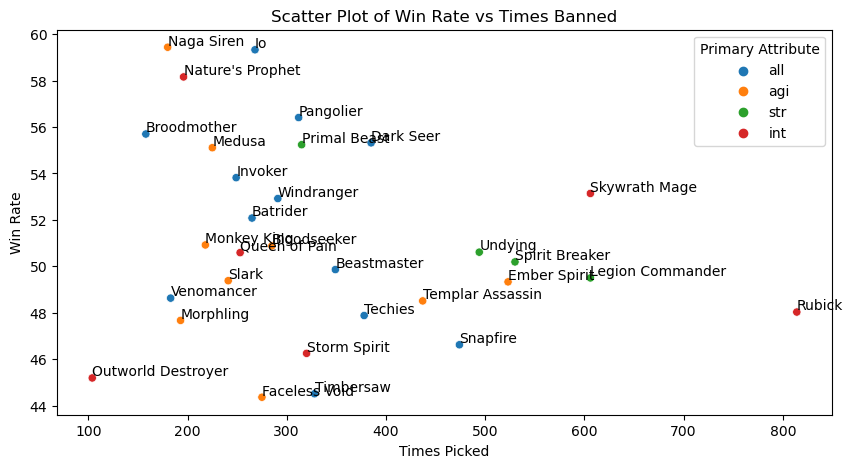

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(data =meta_df, 
                     x='Times Picked', y='Win Rate', 
                     hue='Primary Attribute', alpha = 1)

names = meta_df['Name']
pick = meta_df['Times Picked']
wr = meta_df['Win Rate']
for i, name in enumerate(names):
    ax.text(pick[i]+0.1, wr[i]+0.1, name)
plt.title("Scatter Plot of Win Rate vs Times Banned")
plt.show()